----

# Sprint 10: Proyecto Integrado 2

##Propósito

> Este proyecto de análisis de datos busca investigar el comportamiento del usuario para la aplicación de la empresa emergente que vende productos alimenticios.



##Tabla de contenidos


 1. [Carga de librerías y datos](#1)
 2. [Preprocesamiento de los datos](#2)
 3. [Estudiar los datos](#3)
 4. [Estudiar el embudo de eventos](#4)
 5. [Estudiar los resultados del experimento](#5)
 6. [Conclusiones](#6)


# 1.-Carga <a id='1'></a>

In [ ]:
#Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px
import datetime as dt
import datetime
import math as mth
from scipy import stats as st


In [ ]:
#Cargar los datos
try:
    events  = pd.read_csv('/content/logs_exp_us.csv', sep='\t')
except:
    events  = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')


# 2.-Preprocesamiento <a id='2'></a>

In [ ]:
events

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


Según lo que se observa y la información proporcionada tenemos un dataframe con las siguientes columnas:


> **EventName:** nombre del evento.

> **DeviceIDHash:** identificador de usuario unívoco.

> **EventTimestamp:** hora del evento.

> **ExpId:** número de experimento: 246 y 247 son los grupos de control, 248 es el grupo de prueba.


In [ ]:
#vemos si hay valores ausentes
events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


No hay valores ausentes.

In [ ]:
#Renombremos una de las columnas para facilitar su uso
events = events.rename(columns={"DeviceIDHash":"UserId"})
events

,EventName,UserId,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [ ]:
#Obtengamos una columna de día y hora y otra de solo día a partir de la información que tiene la columna EventTimestamp (formato UNIX)

# Función para convertir el timestamp a datetime
def convertir_a_datetime(timestamp):
    dt = datetime.datetime.fromtimestamp(timestamp)
    return dt.strftime('%Y-%m-%d %H:%M:%S')

# Aplicar la función a la columna 'EventTimestamp' y crear una nueva columna 'dia_hora'
events['dia_hora'] = events['EventTimestamp'].apply(convertir_a_datetime)
events.head()



,EventName,UserId,EventTimestamp,ExpId,dia_hora
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42


In [ ]:
#Lo mismo pero solo para fechas
# Función para convertir el timestamp a datetime
def convertir_a_datetime_dia (timestamp):
    dt = datetime.datetime.fromtimestamp(timestamp)
    return dt.strftime('%Y-%m-%d')

# Aplicar la función a la columna 'EventTimestamp' y crear una nueva columna 'dia_hora'
events['dia'] = events['EventTimestamp'].apply(convertir_a_datetime_dia)
events.head()

,EventName,UserId,EventTimestamp,ExpId,dia_hora,dia
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   UserId          244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
 4   dia_hora        244126 non-null  object
 5   dia             244126 non-null  object
dtypes: int64(3), object(3)
memory usage: 11.2+ MB


In [ ]:
#Ajustemos las columnas de tipo object a tipo datetime
events['dia_hora'] = pd.to_datetime(events['dia_hora'])
events['dia'] = pd.to_datetime(events['dia'])
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   EventName       244126 non-null  object        
 1   UserId          244126 non-null  int64         
 2   EventTimestamp  244126 non-null  int64         
 3   ExpId           244126 non-null  int64         
 4   dia_hora        244126 non-null  datetime64[ns]
 5   dia             244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 11.2+ MB


# 3.-Estudiar los datos <a id='3'></a>

In [ ]:
#¿Cuántos eventos hay en los registros?
events.groupby('EventName').count().sort_values(by='UserId', ascending=False)

,UserId,EventTimestamp,ExpId,dia_hora,dia
EventName,,,,,
MainScreenAppear,119205,119205,119205,119205,119205
OffersScreenAppear,46825,46825,46825,46825,46825
CartScreenAppear,42731,42731,42731,42731,42731
PaymentScreenSuccessful,34313,34313,34313,34313,34313
Tutorial,1052,1052,1052,1052,1052


Hay 5 eventos de los que se compone la visita al sitio web:



*   el acceso a la pantalla principal (Main Screen Appear)
*   la pantalla de oferta (Offers Screen Appear)
*   la pantalla del carrito (Cart Screen Appear)
*   la pantalla de pago (Payment Screen Successful)
*   el tutorial (Tutorial)


Los usuarios pueden, o no, recorrer todas. Y es justo esto lo que se estudia.









In [ ]:
#¿Cuántos usuarios y usuarias hay en los registros?
events['UserId'].nunique()

7551

De un dataframe con 244,126 registros de eventos, tenemos únicamente 7,551 usuarios.

In [ ]:
#Veamos este total de usuarios dividido según la prueba que realizaron
events.groupby('ExpId')['UserId'].nunique()

ExpId
246    2489
247    2520
248    2542
Name: UserId, dtype: int64

In [ ]:
#¿Cuál es el promedio de evento por usuario?
events.groupby('UserId').count().mean()

EventName         32.330287
EventTimestamp    32.330287
ExpId             32.330287
dia_hora          32.330287
dia               32.330287
dtype: float64

El promedio de eventos por usuario es de 32.

In [ ]:
#¿qué periodo de tiempo cubren los datos?
print(events['dia_hora'].min())
print(events['dia_hora'].max())

2019-07-25 04:43:36
2019-08-07 21:15:17


Los datos van del 25 de julio del 2019 a las 04:43:36 hata el 07 de agosto del 2019 a las 21:15:17. Es decir, 2 semanas.

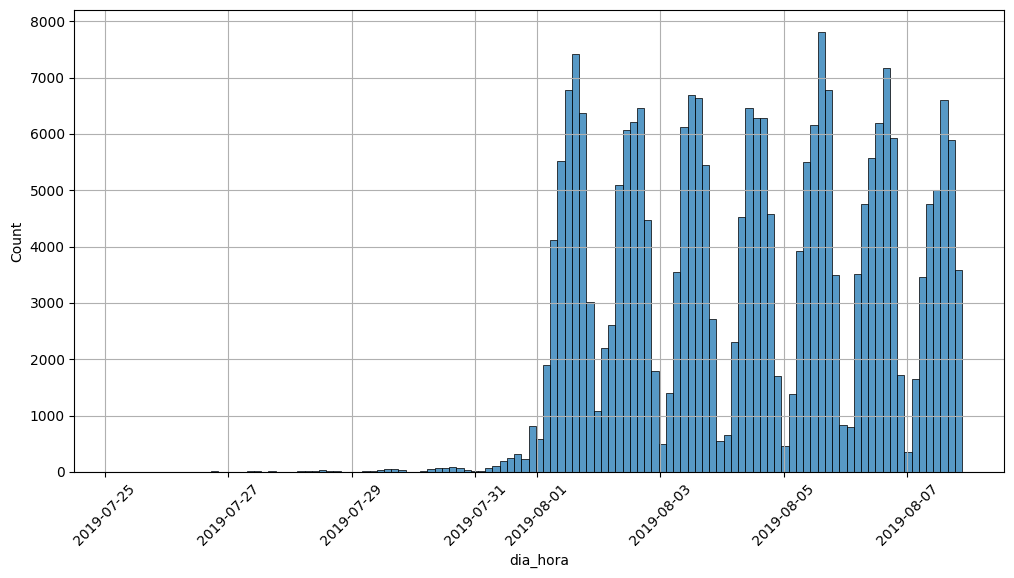

In [ ]:
#histograma por fecha y hora

fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(data=events, x="dia_hora", ax=ax)

plt.xticks(rotation=45)

plt.grid()



In [ ]:
events

,EventName,UserId,EventTimestamp,ExpId,dia_hora,dia
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


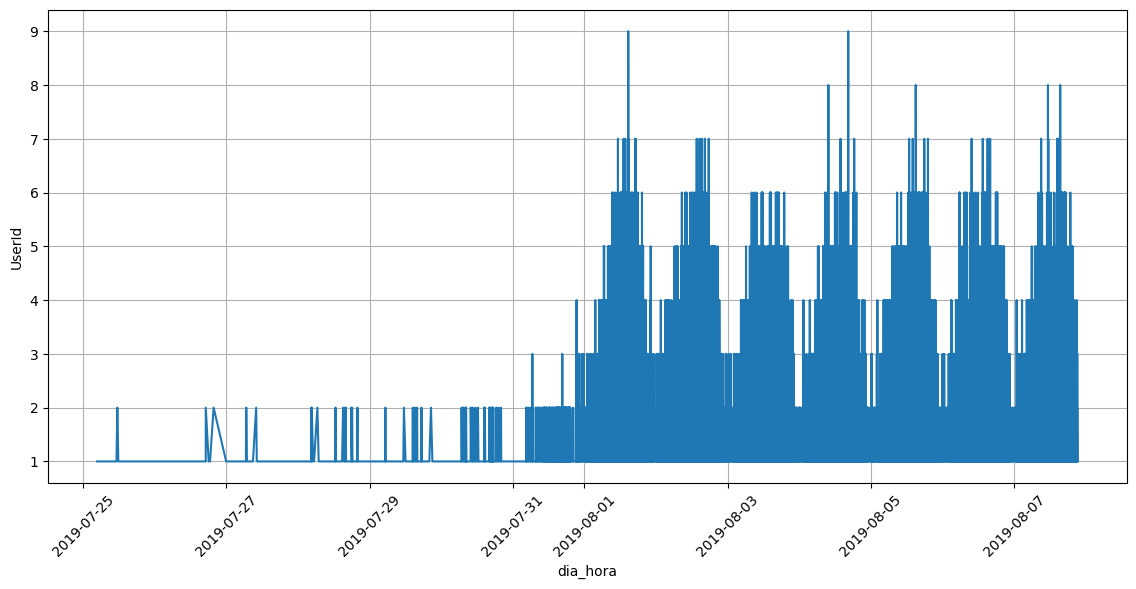

In [ ]:
#La información anterior se puede visualizar de la siguiente manera:
events_count = events.groupby('dia_hora')['UserId'].count()
events_count = events_count.to_frame()

fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=events_count, x="dia_hora", y="UserId", ax=ax)

fig.tight_layout(pad=3.0)

plt.xticks(rotation=45)

plt.grid()

Se observa una gran diferencia en el registro de eventos entra la primera semana y la segunda. Se decide trabajar con los datos a partir de la segunda semana, es decir del 01 de agosto al 07 de agosto del 2019.

In [ ]:
#Filtraremos el dataframe original para trabajar con la segunda semana
events2w = events[events['dia_hora']>='2019-08-01 00:00:00']
events2w

,EventName,UserId,EventTimestamp,ExpId,dia_hora,dia
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [ ]:
diferencia = len(events)-len(events2w)
diferencia

2828

Los eventos que no se van a considerar son únicamente 2,828 de un total de 244,126, es decir, apenas el 1.15%. Sin ellos, estamos centrándonos en la semana realmente activa en las pruebas y evitando los sesgos que puede genera tomar los eventos que transcurrieron durante la primera semana.

In [ ]:
#Confirmemos tener usuarios de los tres grupos experimentales

events2w.groupby('ExpId').count()

,EventName,UserId,EventTimestamp,dia_hora,dia
ExpId,,,,,
246,79425,79425,79425,79425,79425
247,77147,77147,77147,77147,77147
248,84726,84726,84726,84726,84726


In [ ]:
#Revisemos que los usuarios no se repitan
#en la prueba 246 (grupo de control A1),
#en la prueba 247 (grupo de control A2) y
#en la prueba 248 (el grupo de prueba)

#Separemos los grupos
group246 = events2w[events2w['ExpId']==246]
group247 = events2w[events2w['ExpId']==247]
group248 = events2w[events2w['ExpId']==248]

#Confirmemos, con la información que tenemos arriba, que se hayan separado las cantidades correctamente.
print(len(group246))
print(len(group247))
print(len(group248))


79425
77147
84726


In [ ]:
#Revisemos si hay usuarios en más de una prueba
repetidos_246_247 = group246['UserId'].isin(group247['UserId'])
repetidos_247_248 = group247['UserId'].isin(group248['UserId'])
repetidos_248_246 = group248['UserId'].isin(group246['UserId'])
print(repetidos_246_247.sum())
print(repetidos_247_248.sum())
print(repetidos_248_246.sum())

0
0
0


# 4.-Estudiar el embudo de eventos <a id='4'></a>

In [ ]:
#¿Cuántas veces sucedieron los eventos en cada prueba?
e246 = group246.groupby(['ExpId','EventName'])[['UserId']].count()
e246 = e246.sort_values(by=['UserId', 'ExpId', 'EventName'], ascending=False)
e246

UserId
ExpId EventName                      
246   MainScreenAppear          37708
      OffersScreenAppear        14773
      CartScreenAppear          14711
      PaymentScreenSuccessful   11910
      Tutorial                    323

In [ ]:
e247 = group247.groupby(['ExpId','EventName'])[['UserId']].count()
e247 = e247.sort_values(by=['UserId', 'ExpId', 'EventName'], ascending=False)
e247

UserId
ExpId EventName                      
247   MainScreenAppear          39123
      OffersScreenAppear        15182
      CartScreenAppear          12456
      PaymentScreenSuccessful   10043
      Tutorial                    343

In [ ]:
e248 = group248.groupby(['ExpId','EventName'])[['UserId']].count()
e248 = e248.sort_values(by=['UserId', 'ExpId', 'EventName'], ascending=False)
e248

UserId
ExpId EventName                      
248   MainScreenAppear          40600
      OffersScreenAppear        16395
      CartScreenAppear          15198
      PaymentScreenSuccessful   12160
      Tutorial                    373

Aunque con diferentes cantidades de frecuencia de suceso, los eventos se presentaron, de más a menos, en el mismo orden en los tres experimentos. El embudo de eventos que tenemos es:


1.   MainScreenAppear
2.   OffersScreenAppear
3.   CartScreenAppear
4.   PaymentScreenSuccessful

Por su parte, el tutorial no es parte de este embudo. Funciona como una herramienta extra de apoyo dispensable en el proceso.


In [ ]:
#Cálculemos la proporción de usuarios que pasan de una etapa a otra
e246['Retención %'] = ((e246['UserId'] / e246['UserId'].shift(+1)) *100).round(2)
#Sacamos "Tutorial" del embudo
e246 = e246.drop((246, 'Tutorial'))
#imputamos el nulo por su valor que es el 100%
e246 = e246.fillna(100)
e246

UserId  Retención %
ExpId EventName                                   
246   MainScreenAppear          37708       100.00
      OffersScreenAppear        14773        39.18
      CartScreenAppear          14711        99.58
      PaymentScreenSuccessful   11910        80.96

In [ ]:
e247['Retención %'] = ((e247['UserId'] / e247['UserId'].shift(+1)) *100).round(2)
e247 = e247.drop((247, 'Tutorial'))
e247 = e247.fillna(100)
e247

UserId  Retención %
ExpId EventName                                   
247   MainScreenAppear          39123       100.00
      OffersScreenAppear        15182        38.81
      CartScreenAppear          12456        82.04
      PaymentScreenSuccessful   10043        80.63

In [ ]:
e248['Retención %'] = ((e248['UserId'] / e248['UserId'].shift(+1)) *100).round(2)
e248 = e248.drop((248, 'Tutorial'))
e248 = e248.fillna(100)
e248

UserId  Retención %
ExpId EventName                                   
248   MainScreenAppear          40600       100.00
      OffersScreenAppear        16395        40.38
      CartScreenAppear          15198        92.70
      PaymentScreenSuccessful   12160        80.01

En las tres pruebas hay una importante pérdida de usuarios de en el paso de la página principal a la página de ofertas. En el mejor de los casos, se conservó un 40.38% de los usuarios iniciales.

In [ ]:
#Calculemos las tasas de conversión (usuarios que sí compran)

#resultado = df.loc[(246, 'd'), 'Valor'] / df.loc[(246, 'a'), 'OtroValor']


conversion246 = (e246.loc[(246, 'PaymentScreenSuccessful'), 'UserId'] / e246.loc[(246, 'MainScreenAppear'), 'UserId'] *100).round(2)
conversion247 = (e247.loc[(247, 'PaymentScreenSuccessful'), 'UserId'] / e247.loc[(247, 'MainScreenAppear'), 'UserId'] *100).round(2)
conversion248 = (e248.loc[(248, 'PaymentScreenSuccessful'), 'UserId'] / e248.loc[(248, 'MainScreenAppear'), 'UserId'] *100).round(2)

print('Tasa de conversión de la prueba 246 = ', conversion246)
print('Tasa de conversión de la prueba 247 = ', conversion247)
print('Tasa de conversión de la prueba 248 = ', conversion248)

Tasa de conversión de la prueba 246 =  31.58
Tasa de conversión de la prueba 247 =  25.67
Tasa de conversión de la prueba 248 =  29.95


# 5.-Estudiar los resultados del experimento <a id='5'></a>

In [ ]:
#¿Cuántos usuarios únicos tenemos en cada prueba?
events2w.groupby('ExpId')['UserId'].nunique()

ExpId
246    2484
247    2513
248    2537
Name: UserId, dtype: int64

Se tienen las siguientes cantidad de usuarios en cada grupo:

246 tiene 2,484 usuarios

247 tiene 2,513 usuarios

248 tiene 2,537 usuarios

In [ ]:
#Cálculo de usuarios únicos por evento en cada prueba
events2w.groupby(['ExpId','EventName'])[['UserId']].nunique()

UserId
ExpId EventName                      
246   CartScreenAppear           1266
      MainScreenAppear           2450
      OffersScreenAppear         1542
      PaymentScreenSuccessful    1200
      Tutorial                    278
247   CartScreenAppear           1238
      MainScreenAppear           2476
      OffersScreenAppear         1520
      PaymentScreenSuccessful    1158
      Tutorial                    283
248   CartScreenAppear           1230
      MainScreenAppear           2493
      OffersScreenAppear         1531
      PaymentScreenSuccessful    1181
      Tutorial                    279

In [ ]:
#Saquemos el evento tutorial del dataframe para que no forme parte de nuestras comparaciones siguientes:
events2w = events2w[events2w['EventName']!='Tutorial']
events2w['EventName'].unique()

array(['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear',
       'PaymentScreenSuccessful'], dtype=object)

###Cálculo de la diferencia estadísticamente significativa

####Nivel de significancia: 0.05

Para este estudio se utilizará un nivel de significación de:

alpha= 0.05

Lo que implica que nuestras posibilidades de error tipo I son del 5%.

In [ ]:
# Pongamos los grupos y los eventos en variables para usarlas en las funciones que se harán
grupos = events2w['ExpId'].unique()
eventos = events2w['EventName'].unique()
grupos_combinados = {'A': [246,247],'B': [248]}

print(grupos)
print(eventos)
print(grupos_combinados)

[246 247 248]
['MainScreenAppear' 'OffersScreenAppear' 'CartScreenAppear'
 'PaymentScreenSuccessful']
{'A': [246, 247], 'B': [248]}


Consideremos que **éxitos** es la cantidad de veces que sucede el evento y **observaciones** es la cantidad de usuarios únicos.

####Comparación de los grupos individuales

246 vs 247

247 vs 248

248 vs 246

In [ ]:
# Función de eventos indivduales
def comparar_eventos(i, j, evento):

    print("\n")
    print("\n")
    print(f'Prueba de proporciones para el grupo {grupos[i]} versus {grupos[j]} en el evento {evento}')

    datos_i = events2w.query(f'ExpId=={grupos[i]}').groupby(['EventName'])['UserId'].nunique()

    p_grupo1 = datos_i.loc[evento]
    n_grupo1 = events2w.groupby('ExpId')['UserId'].nunique().loc[grupos[i]]

    print(f'Grupo: {grupos[i]}, Éxitos: {p_grupo1}, Observaciones: {n_grupo1}')

    # Evento j
    datos_j = events2w.query(f'ExpId=={grupos[j]}').groupby(['EventName'])['UserId'].nunique()

    p_grupo2 = datos_j.loc[evento]
    n_grupo2 = events2w.groupby('ExpId')['UserId'].nunique().loc[grupos[j]]

    print(f'Grupo: {grupos[j]}, Éxitos: {p_grupo2}, Observaciones: {n_grupo2}')

  #Cálculo de la diferencia estadísticamente significativa de las proporciones de los grupos

    alpha = .05 # nivel de significación

    purchases = np.array([p_grupo1, p_grupo2])
    leads = np.array([n_grupo1, n_grupo2])

    p1 = purchases[0]/leads[0]
    p2 = purchases[1]/leads[1]
    print(f'Proporción del grupo {grupos[i]}: {p1}')
    print(f'Proporción del grupo {grupos[j]}: {p2}')
    p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
    difference = p1 - p2
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-value: ', p_value)
    if (p_value < alpha):
        conclusion = "Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones"
    else:
        conclusion = "No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes"
    print(conclusion)

    resultado = {
        'grupo1': grupos[i],
        'grupo2': grupos[j],
        'evento': evento,
        'exitos_grupo1' : p_grupo1,
        'observaciones_grupo1': n_grupo1,
        'exitos_grupo2' : p_grupo2,
        'observaciones_grupo2' : n_grupo2,
        'p1': p1,
        'p2': p2,
        'pvalue': p_value,
        'conclusion': conclusion
    }

    return resultado

In [ ]:
resultados = []


for i in range(len(grupos)):
    for j in range(i+1, len(grupos)):
        for e in eventos:
            resultados.append(comparar_eventos(i,j, e))

resultados = pd.DataFrame(resultados)
resultados





Prueba de proporciones para el grupo 246 versus 247 en el evento MainScreenAppear
Grupo: 246, Éxitos: 2450, Observaciones: 2483
Grupo: 247, Éxitos: 2476, Observaciones: 2512
Proporción del grupo 246: 0.9867096254530809
Proporción del grupo 247: 0.9856687898089171
p-value:  0.7526703436483038
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes




Prueba de proporciones para el grupo 246 versus 247 en el evento OffersScreenAppear
Grupo: 246, Éxitos: 1542, Observaciones: 2483
Grupo: 247, Éxitos: 1520, Observaciones: 2512
Proporción del grupo 246: 0.6210229561014902
Proporción del grupo 247: 0.6050955414012739
p-value:  0.24786096925282264
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes




Prueba de proporciones para el grupo 246 versus 247 en el evento CartScreenAppear
Grupo: 246, Éxitos: 1266, Observaciones: 2483
Grupo: 247, Éxitos: 1238, Observaciones: 2512
Proporción del grupo 246:

,grupo1,grupo2,evento,exitos_grupo1,observaciones_grupo1,exitos_grupo2,observaciones_grupo2,p1,p2,pvalue,conclusion
0,246,247,MainScreenAppear,2450,2483,2476,2512,0.986710,0.985669,0.752670,No se pudo rechazar la hipótesis nula: no hay ...
1,246,247,OffersScreenAppear,1542,2483,1520,2512,0.621023,0.605096,0.247861,No se pudo rechazar la hipótesis nula: no hay ...
2,246,247,CartScreenAppear,1266,2483,1238,2512,0.509867,0.492834,0.228676,No se pudo rechazar la hipótesis nula: no hay ...
3,246,247,PaymentScreenSuccessful,1200,2483,1158,2512,0.483286,0.460987,0.114466,No se pudo rechazar la hipótesis nula: no hay ...
4,246,248,MainScreenAppear,2450,2483,2493,2535,0.986710,0.983432,0.338711,No se pudo rechazar la hipótesis nula: no hay ...
5,246,248,OffersScreenAppear,1542,2483,1531,2535,0.621023,0.603945,0.214425,No se pudo rechazar la hipótesis nula: no hay ...
6,246,248,CartScreenAppear,1266,2483,1230,2535,0.509867,0.485207,0.080674,No se pudo rechazar la hipótesis nula: no hay ...
7,246,248,PaymentScreenSuccessful,1200,2483,1181,2535,0.483286,0.465878,0.216930,No se pudo rechazar la hipótesis nula: no hay ...
8,247,248,MainScreenAppear,2476,2512,2493,2535,0.985669,0.983432,0.519496,No se pudo rechazar la hipótesis nula: no hay ...
9,247,248,OffersScreenAppear,1520,2512,1531,2535,0.605096,0.603945,0.933375,No se pudo rechazar la hipótesis nula: no hay ...


No hay un adiferencia significativa  entre las muestras 246 y 247 que son los dos grupos de control AA. Tampoco en las demás comparaciones AB.

####Comparación de los grupos combinados

A1+A2 vs B

246 + 247 vs 248

In [ ]:
# Función de eventos combinados
def comparar_eventos_combinados(i,j,evento):

    # Conseguir quienes son los grupos
    grupos_combinados_i = list(grupos_combinados.keys())[i]
    grupos_combinados_i = grupos_combinados[grupos_combinados_i]

    grupos_combinados_j = list(grupos_combinados.keys())[j]
    grupos_combinados_j = grupos_combinados[grupos_combinados_j]

    print("\n")
    print("\n")
    print(f'Prueba de proporciones para los grupos {grupos_combinados_i} versus {grupos_combinados_j} en el evento {evento}')

    datos_i = events2w[events2w['ExpId'].isin(grupos_combinados_i)].groupby(['EventName'])['UserId'].nunique()
    p_grupo1 = datos_i.loc[evento]
    n_grupo1 = events2w[events2w['ExpId'].isin(grupos_combinados_i)]['UserId'].nunique()

    print(f'Grupo: {grupos_combinados_i}, Éxitos: {p_grupo1}, Observaciones: {n_grupo1}')

    # Evento j
    datos_j = events2w[events2w['ExpId'].isin(grupos_combinados_j)].groupby(['EventName'])['UserId'].nunique()

    p_grupo2 = datos_j.loc[evento]
    n_grupo2 = events2w[events2w['ExpId'].isin(grupos_combinados_j)]['UserId'].nunique()

    print(f'Grupo: {grupos_combinados_j}, Éxitos: {p_grupo2}, Observaciones: {n_grupo2}')


    alpha = .05 # nivel de significación

    purchases = np.array([p_grupo1, p_grupo2])
    leads = np.array([n_grupo1, n_grupo2])

    p1 = purchases[0]/leads[0]
    p2 = purchases[1]/leads[1]
    print(f'Proporción del grupo {grupos[i]}: {p1}')
    print(f'Proporción del grupo {grupos[j]}: {p2}')
    p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
    difference = p1 - p2
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-value: ', p_value)
    if (p_value < alpha):
        conclusion = "Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones"
    else:
        conclusion = "No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes"
    print(conclusion)

    resultado = {
        'grupo1': grupos_combinados_i,
        'grupo2': grupos_combinados_j,
        'evento': evento,
        'exitos_grupo1' : p_grupo1,
        'observaciones_grupo1': n_grupo1,
        'exitos_grupo2' : p_grupo2,
        'observaciones_grupo2' : n_grupo2,
        'p1': p1,
        'p2': p2,
        'pvalue': p_value,
        'conclusion': conclusion
    }

    return resultado


In [ ]:
resultados_combinados = []
for i in range(len(grupos_combinados.keys())):
    # Trabajamos con el grupo i
    for j in range(i+1, len(grupos_combinados.keys())):
        for e in eventos:
            resultados_combinados.append(comparar_eventos_combinados(i,j,e))

resultados_combinados = pd.DataFrame(resultados_combinados)
resultados_combinados





Prueba de proporciones para los grupos [246, 247] versus [248] en el evento MainScreenAppear
Grupo: [246, 247], Éxitos: 4926, Observaciones: 4995
Grupo: [248], Éxitos: 2493, Observaciones: 2535
Proporción del grupo 246: 0.9861861861861861
Proporción del grupo 247: 0.9834319526627219
p-value:  0.3486684291093256
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes




Prueba de proporciones para los grupos [246, 247] versus [248] en el evento OffersScreenAppear
Grupo: [246, 247], Éxitos: 3062, Observaciones: 4995
Grupo: [248], Éxitos: 1531, Observaciones: 2535
Proporción del grupo 246: 0.613013013013013
Proporción del grupo 247: 0.6039447731755424
p-value:  0.44582745409482394
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes




Prueba de proporciones para los grupos [246, 247] versus [248] en el evento CartScreenAppear
Grupo: [246, 247], Éxitos: 2504, Observaciones: 4995
Grupo: [248], 

,grupo1,grupo2,evento,exitos_grupo1,observaciones_grupo1,exitos_grupo2,observaciones_grupo2,p1,p2,pvalue,conclusion
0,"[246, 247]",[248],MainScreenAppear,4926,4995,2493,2535,0.986186,0.983432,0.348668,No se pudo rechazar la hipótesis nula: no hay ...
1,"[246, 247]",[248],OffersScreenAppear,3062,4995,1531,2535,0.613013,0.603945,0.445827,No se pudo rechazar la hipótesis nula: no hay ...
2,"[246, 247]",[248],CartScreenAppear,2504,4995,1230,2535,0.501301,0.485207,0.186836,No se pudo rechazar la hipótesis nula: no hay ...
3,"[246, 247]",[248],PaymentScreenSuccessful,2358,4995,1181,2535,0.472072,0.465878,0.610792,No se pudo rechazar la hipótesis nula: no hay ...


###Conclusiones preliminares


En las pruebas de un grupo con otro grupo, 246, 247 y 248 (A/A/B) se obtuvieron en todos los casos, p-values mayores al nivel de signficanción usado de 0.05 por lo que no se puede decir que haya una diferencia significativa entre las proporciones, lo que indica que los grupos se han dividieron correctamente.


En las pruebas de los grupos combinados, es decir A+A vs B, se obtuvieron, también, p-values mayores al nivel de signfición usado de 0.05 por lo que no se puede decir que haya una diferencia significativa entre las proporciones, lo que indica que los grupos se han dividieron correctamente.


Se realizaron en las pruebas de grupos individuales, un total de 12 pruebas de hipótesis, 3 casos con 4 eventos cada uno. Y en con los grupos combinados, fueron 4 pruebas, un caso con 4 eventos.

Se eligió el nivel de significación de 0.05 entendiendo que significa que las pruebas podrían concluir, en un 5% de posibilidad, que sí hay una diferencia cuando en realidad no la hay. Aún así, los resultados no cayeron en ese rubro.

Ante la siguiente circunstancia:



> - Supongamos hacemos 2 pruebas con nivel de significancia 0.05, esto significa que con probabilidad 0.05 habrá un error tipo I para cada test
- Sin embargo, en conjunto, para ambos test, la probabilidad de que haya error de tipo I en al menos uno de ellos se calcula como 1 - la probabilidad de que no haya error tipoe I en ninguno.
- La probabilidad de que no haya error tipo I en un test es 1-0.05=0.95, luego la probabilidad de que no haya error tipo I en ninguno es 0.95^2
- Entonces, la probabilidad de que haya error tipo I en alguno es 1-0.95^2=0.0975. Es decir, el verdadero nivel de significancia del conjunto de los test es mayor, es de 0.0975 en vez de 0.05
- Eso implica que, si queremos que el conjunto de tests tenga significancia 0.05, entonces debemos escoger un nivel de significancia menor para cada test.



 Proponemos que, para mantener el 0.05 como posibilidad de error tipo I -rechazar incorrectamente una hipótesis nula que en realidad es verdadera, o lo que es lo mismo, concluir que hay una diferencia cuando en realidad no la hay- para todo el conjunto de tests, el nivel de significancia sea de 0.003125 obtenido a través de una correción de Benferroni donde dividimos el 0.05 entre el número de pruebas realizadas, 16 en total.



A continuación se corren las pruebas con el nuevo nivel de significancia de 0.003125

###Cálculo de la diferencia estadísticamente significativa

####Nivel de singificancia de 0.003125

Para este estudio se utilizará un nivel de significación de:

alpha= 0.003125

Lo que implica que nuestras posibilidades de error tipo I sean de poco más de 3 por cada mil.

Consideremos que **éxitos** es la cantidad de veces que sucede el evento y **observaciones** es la cantidad de usuarios únicos.

####Comparación de los grupos individuales

246 vs 247

247 vs 248

248 vs 246

In [ ]:
# Función de eventos indivduales
def comparar_eventos(i, j, evento):

    print("\n")
    print("\n")
    print(f'Prueba de proporciones para el grupo {grupos[i]} versus {grupos[j]} en el evento {evento}')

    datos_i = events2w.query(f'ExpId=={grupos[i]}').groupby(['EventName'])['UserId'].nunique()

    p_grupo1 = datos_i.loc[evento]
    n_grupo1 = events2w.groupby('ExpId')['UserId'].nunique().loc[grupos[i]]

    print(f'Grupo: {grupos[i]}, Éxitos: {p_grupo1}, Observaciones: {n_grupo1}')

    # Evento j
    datos_j = events2w.query(f'ExpId=={grupos[j]}').groupby(['EventName'])['UserId'].nunique()

    p_grupo2 = datos_j.loc[evento]
    n_grupo2 = events2w.groupby('ExpId')['UserId'].nunique().loc[grupos[j]]

    print(f'Grupo: {grupos[j]}, Éxitos: {p_grupo2}, Observaciones: {n_grupo2}')

  #Cálculo de la diferencia estadísticamente significativa de las proporciones de los grupos

    alpha = .003125 # nivel de significación

    purchases = np.array([p_grupo1, p_grupo2])
    leads = np.array([n_grupo1, n_grupo2])

    p1 = purchases[0]/leads[0]
    p2 = purchases[1]/leads[1]
    print(f'Proporción del grupo {grupos[i]}: {p1}')
    print(f'Proporción del grupo {grupos[j]}: {p2}')
    p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
    difference = p1 - p2
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-value: ', p_value)
    if (p_value < alpha):
        conclusion = "Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones"
    else:
        conclusion = "No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes"
    print(conclusion)

    resultado = {
        'grupo1': grupos[i],
        'grupo2': grupos[j],
        'evento': evento,
        'exitos_grupo1' : p_grupo1,
        'observaciones_grupo1': n_grupo1,
        'exitos_grupo2' : p_grupo2,
        'observaciones_grupo2' : n_grupo2,
        'p1': p1,
        'p2': p2,
        'pvalue': p_value,
        'conclusion': conclusion
    }

    return resultado

In [ ]:
resultados = []


for i in range(len(grupos)):
    for j in range(i+1, len(grupos)):
        for e in eventos:
            resultados.append(comparar_eventos(i,j, e))

resultados = pd.DataFrame(resultados)
resultados





Prueba de proporciones para el grupo 246 versus 247 en el evento MainScreenAppear
Grupo: 246, Éxitos: 2450, Observaciones: 2483
Grupo: 247, Éxitos: 2476, Observaciones: 2512
Proporción del grupo 246: 0.9867096254530809
Proporción del grupo 247: 0.9856687898089171
p-value:  0.7526703436483038
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes




Prueba de proporciones para el grupo 246 versus 247 en el evento OffersScreenAppear
Grupo: 246, Éxitos: 1542, Observaciones: 2483
Grupo: 247, Éxitos: 1520, Observaciones: 2512
Proporción del grupo 246: 0.6210229561014902
Proporción del grupo 247: 0.6050955414012739
p-value:  0.24786096925282264
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes




Prueba de proporciones para el grupo 246 versus 247 en el evento CartScreenAppear
Grupo: 246, Éxitos: 1266, Observaciones: 2483
Grupo: 247, Éxitos: 1238, Observaciones: 2512
Proporción del grupo 246:

,grupo1,grupo2,evento,exitos_grupo1,observaciones_grupo1,exitos_grupo2,observaciones_grupo2,p1,p2,pvalue,conclusion
0,246,247,MainScreenAppear,2450,2483,2476,2512,0.986710,0.985669,0.752670,No se pudo rechazar la hipótesis nula: no hay ...
1,246,247,OffersScreenAppear,1542,2483,1520,2512,0.621023,0.605096,0.247861,No se pudo rechazar la hipótesis nula: no hay ...
2,246,247,CartScreenAppear,1266,2483,1238,2512,0.509867,0.492834,0.228676,No se pudo rechazar la hipótesis nula: no hay ...
3,246,247,PaymentScreenSuccessful,1200,2483,1158,2512,0.483286,0.460987,0.114466,No se pudo rechazar la hipótesis nula: no hay ...
4,246,248,MainScreenAppear,2450,2483,2493,2535,0.986710,0.983432,0.338711,No se pudo rechazar la hipótesis nula: no hay ...
5,246,248,OffersScreenAppear,1542,2483,1531,2535,0.621023,0.603945,0.214425,No se pudo rechazar la hipótesis nula: no hay ...
6,246,248,CartScreenAppear,1266,2483,1230,2535,0.509867,0.485207,0.080674,No se pudo rechazar la hipótesis nula: no hay ...
7,246,248,PaymentScreenSuccessful,1200,2483,1181,2535,0.483286,0.465878,0.216930,No se pudo rechazar la hipótesis nula: no hay ...
8,247,248,MainScreenAppear,2476,2512,2493,2535,0.985669,0.983432,0.519496,No se pudo rechazar la hipótesis nula: no hay ...
9,247,248,OffersScreenAppear,1520,2512,1531,2535,0.605096,0.603945,0.933375,No se pudo rechazar la hipótesis nula: no hay ...


En todas las pruebas no se pudo rechazar la hipótesis nula, no hay razón para pensar que las proporciones son diferentes, es decir, no hay un diferencia significativa entre las muestras 246 y 247 que son los dos grupos de control AA. Tampoco en las demás comparaciones AB.

####Comparación de los grupos combinados

A1+A2 vs B

246 + 247 vs 248

In [ ]:
# Función de eventos combinados
def comparar_eventos_combinados(i,j,evento):

    # Conseguir quienes son los grupos
    grupos_combinados_i = list(grupos_combinados.keys())[i]
    grupos_combinados_i = grupos_combinados[grupos_combinados_i]

    grupos_combinados_j = list(grupos_combinados.keys())[j]
    grupos_combinados_j = grupos_combinados[grupos_combinados_j]

    print("\n")
    print("\n")
    print(f'Prueba de proporciones para los grupos {grupos_combinados_i} versus {grupos_combinados_j} en el evento {evento}')

    datos_i = events2w[events2w['ExpId'].isin(grupos_combinados_i)].groupby(['EventName'])['UserId'].nunique()
    p_grupo1 = datos_i.loc[evento]
    n_grupo1 = events2w[events2w['ExpId'].isin(grupos_combinados_i)]['UserId'].nunique()

    print(f'Grupo: {grupos_combinados_i}, Éxitos: {p_grupo1}, Observaciones: {n_grupo1}')

    # Evento j
    datos_j = events2w[events2w['ExpId'].isin(grupos_combinados_j)].groupby(['EventName'])['UserId'].nunique()

    p_grupo2 = datos_j.loc[evento]
    n_grupo2 = events2w[events2w['ExpId'].isin(grupos_combinados_j)]['UserId'].nunique()

    print(f'Grupo: {grupos_combinados_j}, Éxitos: {p_grupo2}, Observaciones: {n_grupo2}')


    alpha = .03125 # nivel de significación

    purchases = np.array([p_grupo1, p_grupo2])
    leads = np.array([n_grupo1, n_grupo2])

    p1 = purchases[0]/leads[0]
    p2 = purchases[1]/leads[1]
    print(f'Proporción del grupo {grupos[i]}: {p1}')
    print(f'Proporción del grupo {grupos[j]}: {p2}')
    p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
    difference = p1 - p2
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-value: ', p_value)
    if (p_value < alpha):
        conclusion = "Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones"
    else:
        conclusion = "No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes"
    print(conclusion)

    resultado = {
        'grupo1': grupos_combinados_i,
        'grupo2': grupos_combinados_j,
        'evento': evento,
        'exitos_grupo1' : p_grupo1,
        'observaciones_grupo1': n_grupo1,
        'exitos_grupo2' : p_grupo2,
        'observaciones_grupo2' : n_grupo2,
        'p1': p1,
        'p2': p2,
        'pvalue': p_value,
        'conclusion': conclusion
    }

    return resultado


In [ ]:
resultados_combinados = []
for i in range(len(grupos_combinados.keys())):
    # Trabajamos con el grupo i
    for j in range(i+1, len(grupos_combinados.keys())):
        for e in eventos:
            resultados_combinados.append(comparar_eventos_combinados(i,j,e))

resultados_combinados = pd.DataFrame(resultados_combinados)
resultados_combinados





Prueba de proporciones para los grupos [246, 247] versus [248] en el evento MainScreenAppear
Grupo: [246, 247], Éxitos: 4926, Observaciones: 4995
Grupo: [248], Éxitos: 2493, Observaciones: 2535
Proporción del grupo 246: 0.9861861861861861
Proporción del grupo 247: 0.9834319526627219
p-value:  0.3486684291093256
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes




Prueba de proporciones para los grupos [246, 247] versus [248] en el evento OffersScreenAppear
Grupo: [246, 247], Éxitos: 3062, Observaciones: 4995
Grupo: [248], Éxitos: 1531, Observaciones: 2535
Proporción del grupo 246: 0.613013013013013
Proporción del grupo 247: 0.6039447731755424
p-value:  0.44582745409482394
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes




Prueba de proporciones para los grupos [246, 247] versus [248] en el evento CartScreenAppear
Grupo: [246, 247], Éxitos: 2504, Observaciones: 4995
Grupo: [248], 

,grupo1,grupo2,evento,exitos_grupo1,observaciones_grupo1,exitos_grupo2,observaciones_grupo2,p1,p2,pvalue,conclusion
0,"[246, 247]",[248],MainScreenAppear,4926,4995,2493,2535,0.986186,0.983432,0.348668,No se pudo rechazar la hipótesis nula: no hay ...
1,"[246, 247]",[248],OffersScreenAppear,3062,4995,1531,2535,0.613013,0.603945,0.445827,No se pudo rechazar la hipótesis nula: no hay ...
2,"[246, 247]",[248],CartScreenAppear,2504,4995,1230,2535,0.501301,0.485207,0.186836,No se pudo rechazar la hipótesis nula: no hay ...
3,"[246, 247]",[248],PaymentScreenSuccessful,2358,4995,1181,2535,0.472072,0.465878,0.610792,No se pudo rechazar la hipótesis nula: no hay ...


En todas las pruebas no se pudo rechazar la hipótesis nula, no hay razón para pensar que las proporciones son diferentes, es decir, no hay un diferencia significativa entre las muestras AA vs B en sus 4 eventos.

# 6.-Conclusiones <a id='6'></a>

Se observan distintos resultados entre los dos grupos de controldel test A/A: el 246 y 247. El 246 es el que obtuvo más compras. Antes de poder tener una comparación confiable con el grupo 248, debe comprenderse cual es el factor que genera esta diferencia.

Las pruebas de hipotesis arrojaron en todos los casos de comparación de grupos un pvalue mayor al nivel de significación que usamos de 0.05 (alpha) por lo que no se pudieron rechazar las hipótesis nulas que argumentaban la igualdad de las proporciones.

En las pruebas donde usamos un nivel de significación de 0.03125, tampoco se pudieron rechazar las hipótesis.